In [1]:
from goobergrad import nn
from goobergrad import eval
from goobergrad.nn import Value
import numpy as np
import matplotlib.pyplot as plt
import mnist

# data processing


In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
#normalized between 0-1
train_images = train_images / 255
test_images = test_images / 255

5


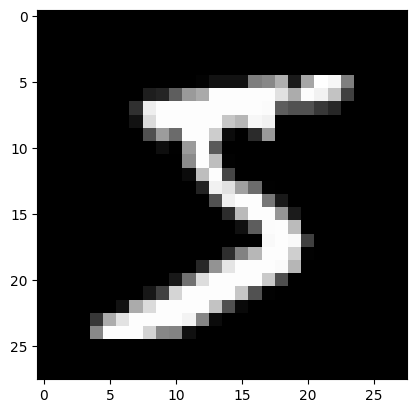

In [4]:
plt.imshow(train_images[0], cmap='gray')
print(train_labels[0])

In [5]:
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)


In [6]:
b = np.zeros((train_labels.size, train_labels.max()+1))
b[np.arange(train_labels.size), train_labels] = 1
train_labels = b

In [7]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# model definition

In [21]:
model = nn.MLP([784, 50, 50, 10])

ypred = model(train_images[0])
ypred = nn.softmax(ypred)


# training


In [22]:
import random

In [23]:
def random_batch(images, labels, batch_size):
    indexes = [random.randint(0, labels.shape[0]-1) for _ in range(batch_size)]
    for i in indexes:
        yield (images[i], labels[i])


In [24]:
def get_grad(val):
    return val.grad

for epoch in range(1):
    print(f'EPOCH: {epoch+1}')
    for i in range(50):
        
        loss = Value(0.0)
        max_grad = []
        ypred = []
        
        for image, label in random_batch(train_images, train_labels, 5):
           
            ypred = model(image)
            ypred = nn.softmax(ypred)
            loss += eval.CrossEntropy(ypred, label)
            print(["%.4f" % num for num in [yp.data for yp in ypred]])
            print(f'actual: {np.argmax(np.array(label), axis=0)} prediction {np.argmax(ypred, axis=0)}')
            
            
        
        model.zero_grad()
        loss.backward(1.2)
        model.step(.05, True)
        for x in ypred:
            print(x.grad)
        print(f'loss: {loss}')

        
        

EPOCH: 1
['0.0952', '0.0882', '0.1012', '0.1063', '0.0871', '0.1472', '0.0818', '0.1038', '0.0751', '0.1141']
actual: 4 prediction 5
['0.1058', '0.0927', '0.1018', '0.1112', '0.0883', '0.1397', '0.0864', '0.0964', '0.0778', '0.0998']
actual: 7 prediction 5
['0.0899', '0.0861', '0.1037', '0.1055', '0.0834', '0.1618', '0.0798', '0.1090', '0.0628', '0.1179']
actual: 5 prediction 5
['0.0847', '0.0900', '0.1178', '0.0965', '0.0751', '0.1494', '0.0890', '0.1033', '0.0761', '0.1182']
actual: 8 prediction 5
['0.0983', '0.0987', '0.1067', '0.0950', '0.0859', '0.1348', '0.0760', '0.1019', '0.0826', '0.1201']
actual: 2 prediction 5
-1.2
-1.2
-1.2
-1.2
-1.2
-1.2
-1.2
-1.2
-1.2
-1.2
loss: Value(11.41501751979802)
['0.0580', '0.0709', '0.1275', '0.0467', '0.0467', '0.2361', '0.0605', '0.0954', '0.0496', '0.2085']
actual: 7 prediction 5
['0.0584', '0.0691', '0.1219', '0.0389', '0.0466', '0.2769', '0.0571', '0.0909', '0.0448', '0.1955']
actual: 0 prediction 5
['0.0549', '0.0733', '0.1352', '0.0496', '

ValueError: math domain error

for image, label in random_batch(train_images, train_labels, 150):
    model.zero_grad()
            
    ypred = model(image)
    ypred = nn.softmax(ypred)
    loss = eval.CrossEntropy(ypred, label)
    before = loss.data
    
    loss.backward()
    model.step(.05)
    for y in ypred:
        print(y.grad)
    print(f'ypred{ypred}\n loss {loss}')
    